###1. Optimization problem example
$S = 2\pi r(r+h)$ (1) \\
$V = \pi r^2h$ (2), fix r $\Rightarrow$ \\
$h = \frac{V}{\pi r^2}$ (3) $\rightarrow$ (1) $\Rightarrow$ \\
$S(r) = 2\pi r(r+h)=2\pi r^2 + 2\frac{V}{R}$ (4) \\
$S'(r) = \frac{4\pi r^3-3V}{r^2} = 0$ (5) -- necessary condition of minimum \\
$\Rightarrow r = \sqrt[3]\frac{V}{2\pi}$ (6) $\rightarrow$ (3) $\Rightarrow$ \\
$\Rightarrow h = \sqrt[3]\frac{4V}{\pi}$ (7) \\
Answer: 
\begin{cases}
r = \sqrt[3]\frac{V}{2\pi} \\
h = \sqrt[3]\frac{4V}{\pi}
\end{cases}

###2. Optimally conditions

Necessary conditions of minimum:
\begin{cases}
\frac{d}{dx}(\frac{3}{2} (x^2 + y^2) + (1+a)xy - (x+y)+b)) = 0 \\
\frac{d}{dy}(\frac{3}{2} (x^2 + y^2) + (1+a)xy - (x+y)+b)) = 0 \\
\end{cases} (1)



Sufficient conditions of minimum:
\begin{cases}
\frac{d^2}{dx^2}(\frac{3}{2}(x^2+y^2)+(1+a)xy-(x+y)+b))=3 \\
\frac{d^2}{dy^2}(\frac{3}{2}(x^2+y^2)+(1+a)xy-(x+y)+b))=3 \\
\frac{d^2}{dxdy}(\frac{3}{2}(x^2+y^2)+(1+a)xy-(x+y)+b))=a+1 \\
\end{cases}
$\Rightarrow$
\begin{equation*}
H = 
\begin{bmatrix}
3 & a+1 \\
a+1 & 3
\end{bmatrix}
\end{equation*}
(2)

(1) $\Rightarrow$
\begin{cases}
ay + 3x + y = 1 \\
ax + x + 3y = 1 \\
\end{cases} (3) \\

(2) $\Rightarrow$ \\
\begin{gather*}
-4<a<2
\end{gather*} (4) 

$\Rightarrow$
\begin{cases}
a = 2 \\
y = \frac{1}{3} (1-3x) \\
9 - (1+a)^2 \neq 0
\end{cases}

(3), (4) $\Rightarrow$ Answer:
\begin{cases}
-4<a<2 \\
b \in R
\end{cases}

###3. Nelder Mead method

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def f_point(point):
    x, y = point.T
    return np.sin(y) * np.exp(1-np.cos(x))**2 + np.cos(x) * np.exp(1-np.sin(y))**2 + (x - y)**2

def f_constraint(point):
    x, y = point.T
    return (x + 5)**2 + (y + 5)**2 - 25 > 0

def f_general(func, constraint, inf=np.inf):
    def fffunc(point): 
        vals = func(point)
        constraint_flag = constraint(point)
        if np.isscalar(vals):
            if constraint_flag: vals = inf
        else:
            vals[constraint_flag] = inf
        return vals
    return fffunc

def plot_function(func, N=100, lims=(-10, 0), figsize=(8, 8)):
    xlist = np.linspace(*lims, N+1)
    ylist = np.linspace(*lims, N+1)
    x, y = np.meshgrid(xlist, ylist)
    plt.figure(figsize=figsize)
    xy = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))
    f1 = func(xy).reshape(N+1, N+1)
    plt.contourf(x, y, f1)
    plt.title(r'$f = sin(y) * exp(1-cos(x))^2 + cos(x) * exp(1-sin(y))^2 + (x - y)^2$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.grid(True)
    #print("Min:", np.min(f1))

def nelder_mead(func, alpha=1, beta=0.5, gamma=2, iters=100, eps=1e-7, init=[[0, 0], [-2, 0], [-2, 2]]):
    plot_function(func)
    v_init = np.array(init)

    for i in range(iters):
        f_vals = func(v_init)
        order = np.argsort(f_vals)
        b, g, w = v_init[order]
        fb, fg, fw = f_vals[order]

        plt.plot([b[0],g[0],w[0],b[0]], [b[1],g[1],w[1],b[1]], "--")
        
        mid = (g + b)/2

        # reflection
        xr = mid + alpha * (mid - w)        
        fxr = func(xr)

        if fxr < fg:
            w = xr
        else:
            if fxr < fw:
                w = xr
            c = (w + mid)/2
            if func(c) < fw:
                w = c
        if fxr < fb:
            # expansion
            xe = mid + gamma * (xr - mid)
            if func(xe) < fxr:
                w = xe
            else:
                w = xr
        if fxr > fg:
            # contraction
            xc = mid + beta * (w - mid)
            if func(xc) < fw:
                w = xc

        # update points
        v_init = np.vstack([w, g, b])

        if abs(f_point(b) - f_point(g)) < eps:
          break

    print ("Starting points: x0={}".format(init))
    print ("Appr. min: {} at x*={}".format(func(b), b))
    print ("Found after {} iterations".format(i))
    print ('Eps: {}'.format(eps))
    return b

2: The algorithm may converge to diﬀerent points depending on the starting point:

Starting points: x0=[[-2, -6], [-1.5, -6], [-2, -8]]
Appr. min: -87.52029877457159 at x*=[-3.19803669 -7.79753999]
Found after 22 iterations
Eps: 1e-07


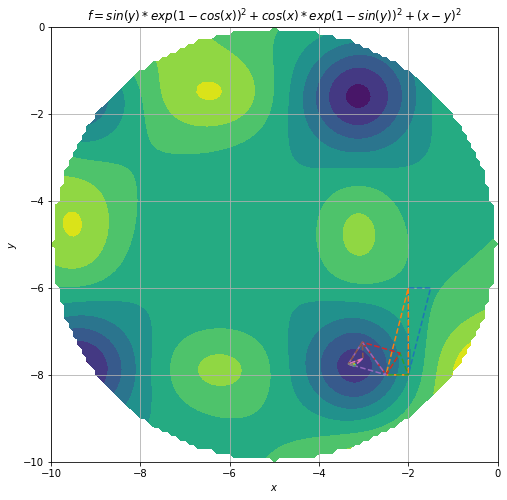

In [0]:
init = [[-2, -6], [-1.5, -6], [-2, -8]]
foo = f_general(f_point, f_constraint, np.inf)
xk = nelder_mead(foo, iters=100, init=init)

Starting points: x0=[[-2, -4], [-4, -4], [-4, -2]]
Appr. min: -106.7877336844742 at x*=[-3.1228632  -1.58953196]
Found after 28 iterations
Eps: 1e-07


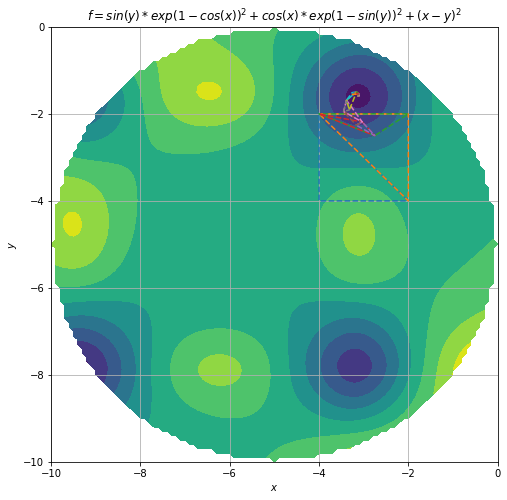

In [0]:
#init = [[-8, -2], [-8, -1.5], [-8.5, -2]]
init = [[-2, -4], [-4, -4], [-4, -2]]
xk = nelder_mead(foo, iters=100, init=init)

3: With various parameters α, β and γ and one chosen x0 the method may converge to diﬀerent points:

With the default parameters (alpha=1, beta=0.5, gamma=2) and x0=[[-2, -4], [-4, -4], [-4, -2]]:

Starting points: x0=[[-2, -4], [-4, -4], [-4, -2]]
Appr. min: -106.7877336844742 at x*=[-3.1228632  -1.58953196]
Found after 28 iterations
Eps: 1e-07


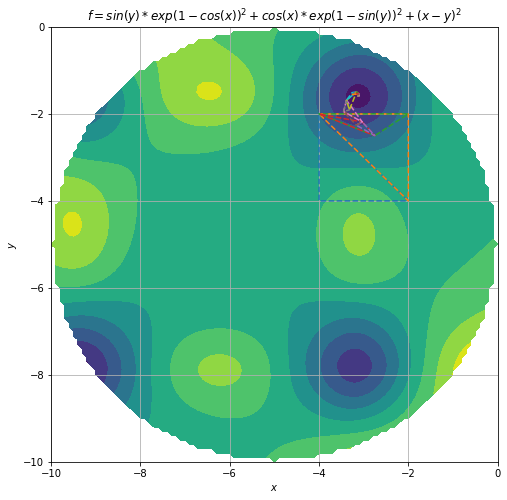

In [0]:
init = [[-2, -4], [-4, -4], [-4, -2]]
xk = nelder_mead(foo, iters=100, init=init)

With alpha=1, beta=0.25, gamma=2:

Starting points: x0=[[-2, -4], [-4, -4], [-4, -2]]
Appr. min: -89.22142358001432 at x*=[-3.17787379 -2.07260463]
Found after 15 iterations
Eps: 1e-07


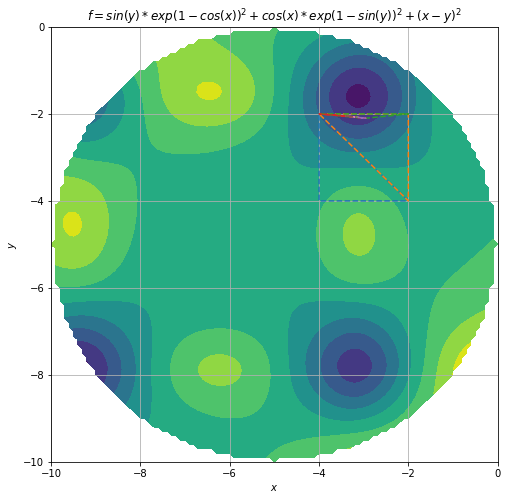

In [0]:
xk = nelder_mead(foo, alpha=1, beta=0.1, gamma=2, iters=100, init=init)

With alpha=2, beta=0.25, gamma=3:

Starting points: x0=[[-2, -4], [-4, -4], [-4, -2]]
Appr. min: -54.077152031719365 at x*=[-3.8661796  -2.15269225]
Found after 39 iterations
Eps: 1e-07


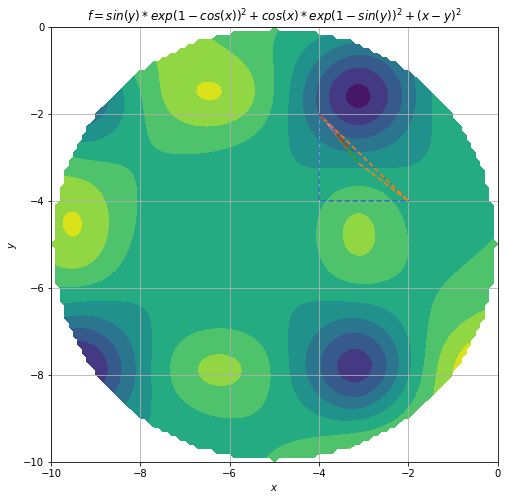

In [0]:
xk = nelder_mead(foo, alpha=2, beta=0.25, gamma=3, iters=100, init=init)

###4. Coordinate descend

In [0]:
def df(point):
    x, y = point.T
    dy = -2*(x - y) + np.exp(2 - 2*np.cos(x))*np.cos(y) - 2*np.exp(2 - 2*np.sin(y))*np.cos(x)*np.cos(y)
    dx = 2*(x - y) - np.exp(2 - 2*np.sin(y))*np.sin(x) + 2*np.exp(2 - 2*np.cos(x))*np.sin(x)*np.sin(y)
    return dx, dy

In [0]:
def gradient_descent(x0, y0, iters, eps=1e-7, tau=1e-3):
    plot_function(f_point)
    u = np.empty((iters, 2))
    df_t = np.empty((iters-1, 2))
    u[0] = x0, y0
    for t in range(1, iters):
        df_t[t-1] = df(u[t-1])
        if np.linalg.norm(df_t[t-1]) < eps:
            break

        u[t] = u[t-1] - tau*df_t[t-1]

    scale = 5
    plt.plot(u[:, 0], u[:, 1], "ro")
    for t in range(iters-1):
        plt.arrow(*u[t], *(-df_t[t]*tau/scale), head_width=0.03, ec="r", fc="w")

    print ('Starting point: x0={}'.format([x0, y0]))
    print ('Appr.min: {} at x*={}'.format(f_point(u[t-1]), u[t-1]))
    print ('Found after {} iterations'.format(t))
    print ('Eps: {}'.format(eps))
    print ('Tau: {}'.format(tau))
    return u[t-1], f_point(u[t-1]), t

Starting point: x0=[-2, -8]
Appr.min: -87.52029879774338 at x*=[-3.19802366 -7.79755057]
Found after 98 iterations
Eps: 1e-07
Tau: 0.001


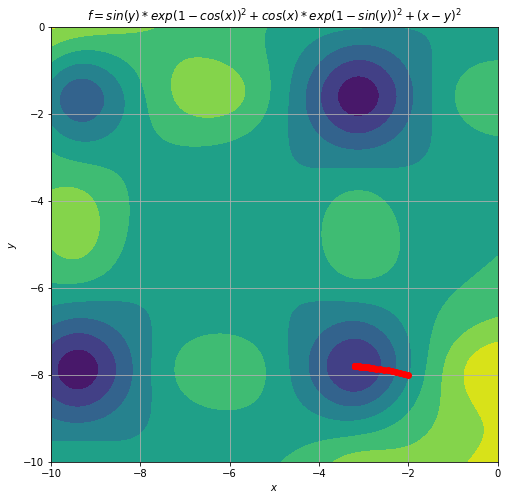

In [0]:
gradient_descent(-2, -8, 100, tau=1e-3);

Starting point: x0=[-4, -4]
Appr.min: -105.89941110243186 at x*=[-3.18786034 -1.67123764]
Found after 1098 iterations
Eps: 1e-07
Tau: 0.0001


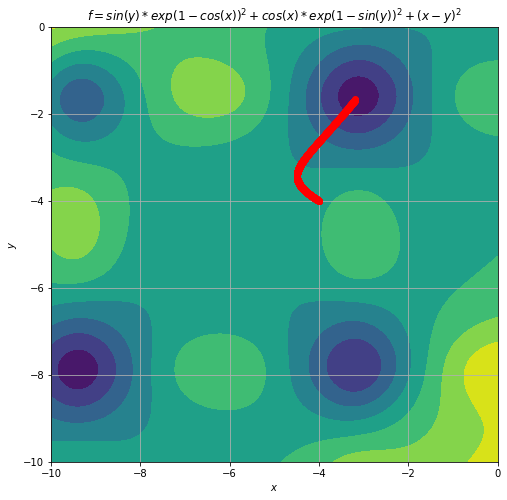

In [0]:
gradient_descent(-4, -4, 1100, tau=1e-4);

As we can see, starting from almost the same initial points (-2,-6) and (-4,-4), Nelder Mead method achieves 1e-7 accuracy in 22, 28 iterations correspondingly, while Coordinate descent method - in 498 and 1098 iterations correspondingly. \\
So, for this function, Nelder Mead method performed better.